In [16]:
import seaborn as sns
from IPython.display import Markdown
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics in Italy
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
italy_region_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'TotalPositiveCases']].style.background_gradient(cmap=cm).hide_index()


# COVID-19 statistics in Italy
## Last Updated: 2020-03-16 17:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases


RegionName,TotalPositiveCases
Lombardia,14649
Emilia Romagna,3522
Veneto,2473
Piemonte,1516
Marche,1242
Toscana,866
Liguria,667
Lazio,523
Campania,400
Friuli Venezia Giulia,386


In [17]:
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'ProvinceName', 'TotalPositiveCases']][:20].style.background_gradient(cmap=cm).hide_index()

RegionName,ProvinceName,TotalPositiveCases
Lombardia,Bergamo,3760
Lombardia,Brescia,2918
Lombardia,Milano,1983
Lombardia,Cremona,1881
Lombardia,Lodi,1362
Emilia Romagna,Piacenza,1073
Lombardia,Pavia,801
Marche,Pesaro e Urbino,733
Veneto,Padova,715
Emilia Romagna,Parma,707


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium
# may require pip install folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [5]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [6]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-16 17:00:00
(462, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,462.0,188.660173,715.418946,0.0,1.0,9.5,70.25,6994.0
Deaths,462.0,23.642857,121.272019,0.0,0.0,0.0,4.00,1420.0
TotalPositiveCases,462.0,374.740260,1391.031925,0.0,3.0,24.5,166.75,14649.0
TestsPerformed,462.0,2322.640693,5773.972053,0.0,52.0,335.5,1550.75,43565.0


In [7]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-16 17:00:00
TotalHospitalizedPatients                   6994
Deaths                                      1420
TotalPositiveCases                         14649
TestsPerformed                             43565
dtype: object

In [8]:
display(Markdown("""
### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at {last_date}). 
""".format(last_date=last_date)))


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at 2020-03-16 17:00:00). 


In [9]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

450                Lombardia
446           Emilia Romagna
461                   Veneto
453                 Piemonte
451                   Marche
457                  Toscana
449                  Liguria
448                    Lazio
445                 Campania
447    Friuli Venezia Giulia
458              P.A. Trento
443             P.A. Bolzano
454                   Puglia
456                  Sicilia
441                  Abruzzo
459                   Umbria
455                 Sardegna
460            Valle d'Aosta
444                 Calabria
452                   Molise
442               Basilicata
Name: RegionName, dtype: object

# Statistics per region

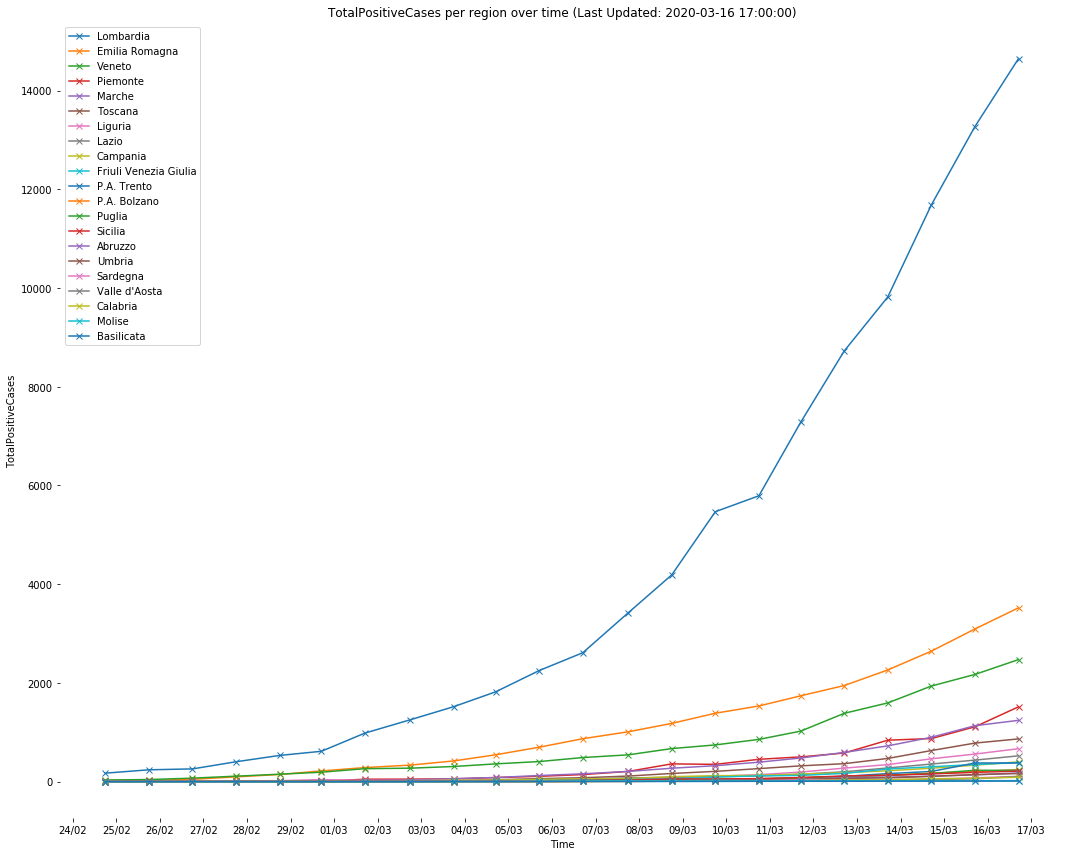

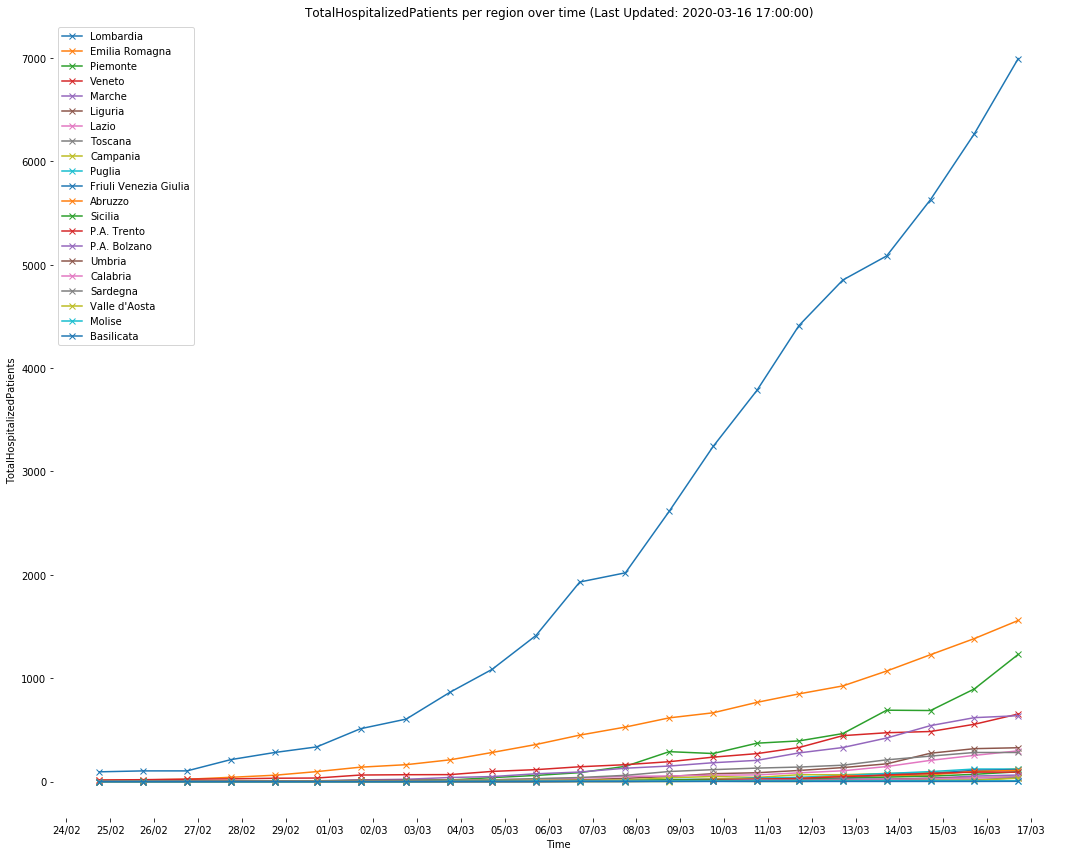

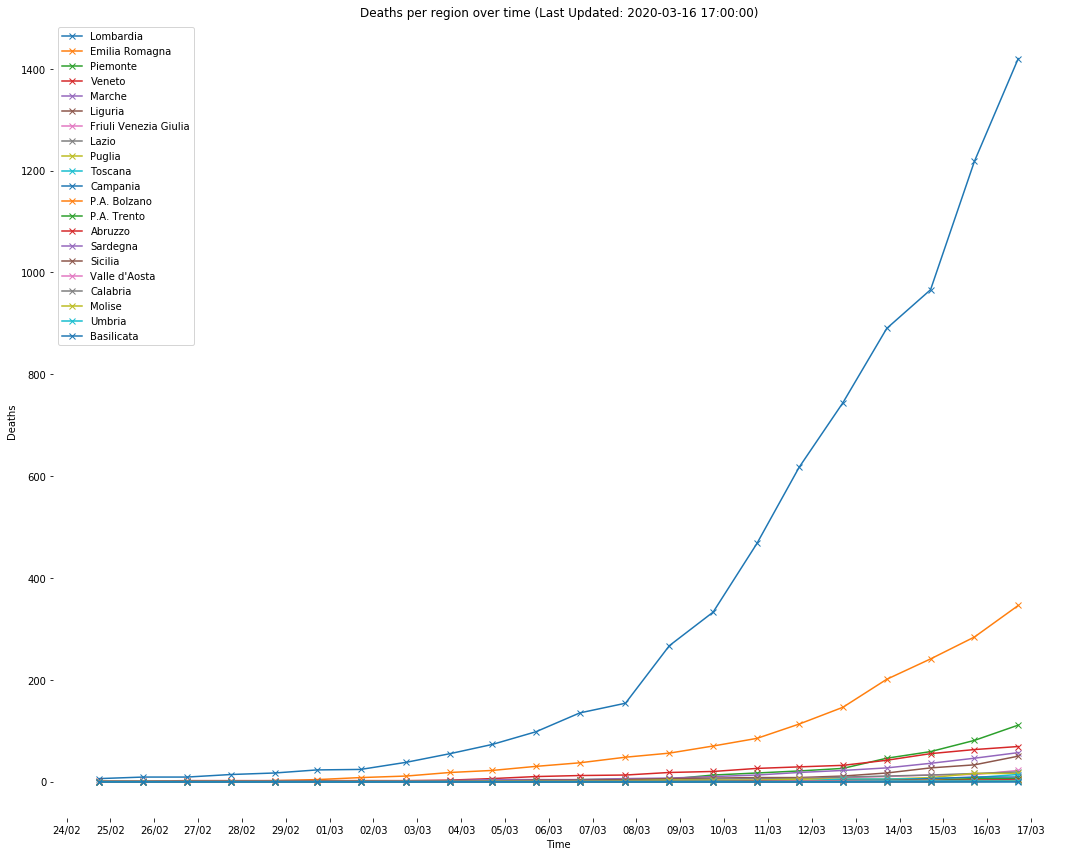

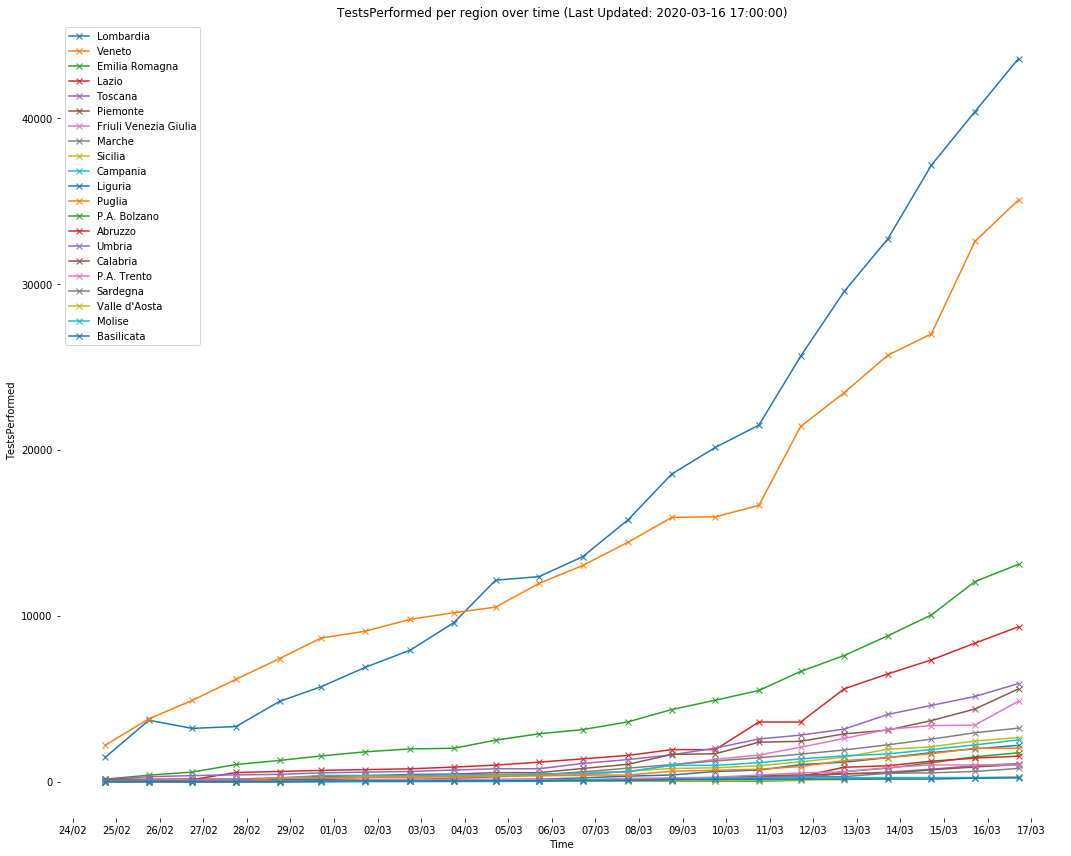

In [10]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [11]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]

# Regional geolocation

In [13]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/350,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [14]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]

# Provincial geolocation

In [15]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map